Création d'un DF neutre

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/Users/julesmourgues/Documents/Data Challenge/"

# Importer les données Rennes_DataChallenge2024_Cryptomarkets_dataset.xlsx
df = pd.read_excel(path + "Rennes_DataChallenge2024_Cryptomarkets_dataset.xlsx", sheet_name="data")

list_crypto = ["BTC", "ETH", "BNB", "LTC", "DOGE", "BCH", "XRP", "MATIC", "ADA", "DOT", "SOL"]



#Met en datetime la colonne date
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df = df.drop(columns=["Unnamed: 0"])

#Pour chaque nom dans la liste des cryptos, on crée un dataframe avec les colonnes qui commence par le nom de la crypto en minuscle, et les colonnes qui finisse par le nom de la crypto en majuscule
for crypto in list_crypto:
    globals()[crypto] = df[[col for col in df.columns if col.startswith(crypto.lower()) or col.endswith(crypto.upper())]]
    #Supprimer les lignes jusqu'à la première date où le prix de cloture est disponible
    globals()[crypto] = globals()[crypto].dropna(axis=0, subset=["Close_" + crypto.upper()])


In [3]:
#Met en datetime la colonne date
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df = df.drop(columns=["Unnamed: 0"])

#Pour chaque nom dans la liste des cryptos, on crée un dataframe avec les colonnes qui commence par le nom de la crypto en minuscle, et les colonnes qui finisse par le nom de la crypto en majuscule
for crypto in list_crypto:
    globals()[crypto] = df[[col for col in df.columns if col.startswith(crypto.lower()) or col.endswith(crypto.upper())]]
    #Supprimer les lignes jusqu'à la première date où le prix de cloture est disponible
    globals()[crypto] = globals()[crypto].dropna(axis=0, subset=["Close_" + crypto.upper()])



In [53]:
XRP

,xrp_tweet_count,xrp_posts_count,xrp_textblob_polarity_min,xrp_textblob_polarity_max,xrp_textblob_polarity_mean,xrp_vader_polarity_compound_min,xrp_vader_polarity_compound_max,xrp_vader_polarity_compound_mean,Close_XRP,Volume_XRP
date,,,,,,,,,,
2018-05-04,73,23.0,-0.300000,0.800000,0.094125,-0.7845,0.8402,0.027730,0.88990,2.089021e+07
2018-05-07,65,32.0,-0.600000,0.504167,0.029303,-0.5267,0.9578,0.111519,0.82490,1.730349e+07
2018-05-08,59,19.0,-0.133333,0.481771,0.074181,-0.8317,0.8264,0.093926,0.80667,1.297130e+07
2018-05-09,66,26.0,-0.400000,0.625000,0.102159,-0.4767,0.8968,0.137400,0.79481,1.398238e+07
2018-05-10,70,18.0,0.000000,0.531250,0.166551,-0.4215,0.9561,0.277256,0.74558,1.013690e+07
...,...,...,...,...,...,...,...,...,...,...
2023-03-20,125,21.0,-0.600000,0.600000,0.090798,-0.3400,0.9698,0.229976,0.37340,4.431294e+08
2023-03-21,387,21.0,-0.357143,0.800000,0.115606,-0.7488,0.7865,0.037433,0.46960,1.698381e+09
2023-03-22,172,29.0,-0.232917,0.400000,0.051473,-0.9117,0.7891,0.017431,0.42130,1.409641e+09


In [52]:

for crypto in list_crypto:
    print("Pour la crypto :",crypto,"\n")
    column_name = next(col for col in globals()[crypto].columns if col.endswith('_posts_count'))
    print ("Nombre de valeurs manquantes :",globals()[crypto][column_name].isnull().sum())
    print("Longueur de la série : ",len(globals()[crypto]))
    print("Ratio : ", round(globals()[crypto][column_name].isnull().sum()/len(BTC) * 100, 2),"%\n")

Pour la crypto : BTC 

Nombre de valeurs manquantes : 210
Longueur de la série :  1462
Ratio :  14.36 %

Pour la crypto : ETH 

Nombre de valeurs manquantes : 47
Longueur de la série :  1462
Ratio :  3.21 %

Pour la crypto : BNB 

Nombre de valeurs manquantes : 19
Longueur de la série :  1405
Ratio :  1.3 %

Pour la crypto : LTC 

Nombre de valeurs manquantes : 2
Longueur de la série :  1378
Ratio :  0.14 %

Pour la crypto : DOGE 

Nombre de valeurs manquantes : 27
Longueur de la série :  971
Ratio :  1.85 %

Pour la crypto : BCH 

Nombre de valeurs manquantes : 4
Longueur de la série :  867
Ratio :  0.27 %

Pour la crypto : XRP 

Nombre de valeurs manquantes : 123
Longueur de la série :  1276
Ratio :  8.41 %

Pour la crypto : MATIC 

Nombre de valeurs manquantes : 1
Longueur de la série :  1011
Ratio :  0.07 %

Pour la crypto : ADA 

Nombre de valeurs manquantes : 78
Longueur de la série :  790
Ratio :  5.34 %

Pour la crypto : DOT 

Nombre de valeurs manquantes : 2
Longueur de la sér

In [57]:
ETH.columns

Index(['eth_tweet_count', 'eth_posts_count', 'eth_textblob_polarity_min',
       'eth_textblob_polarity_max', 'eth_textblob_polarity_mean',
       'eth_vader_polarity_compound_min', 'eth_vader_polarity_compound_max',
       'eth_vader_polarity_compound_mean', 'Close_ETH', 'Volume_ETH'],
      dtype='object')

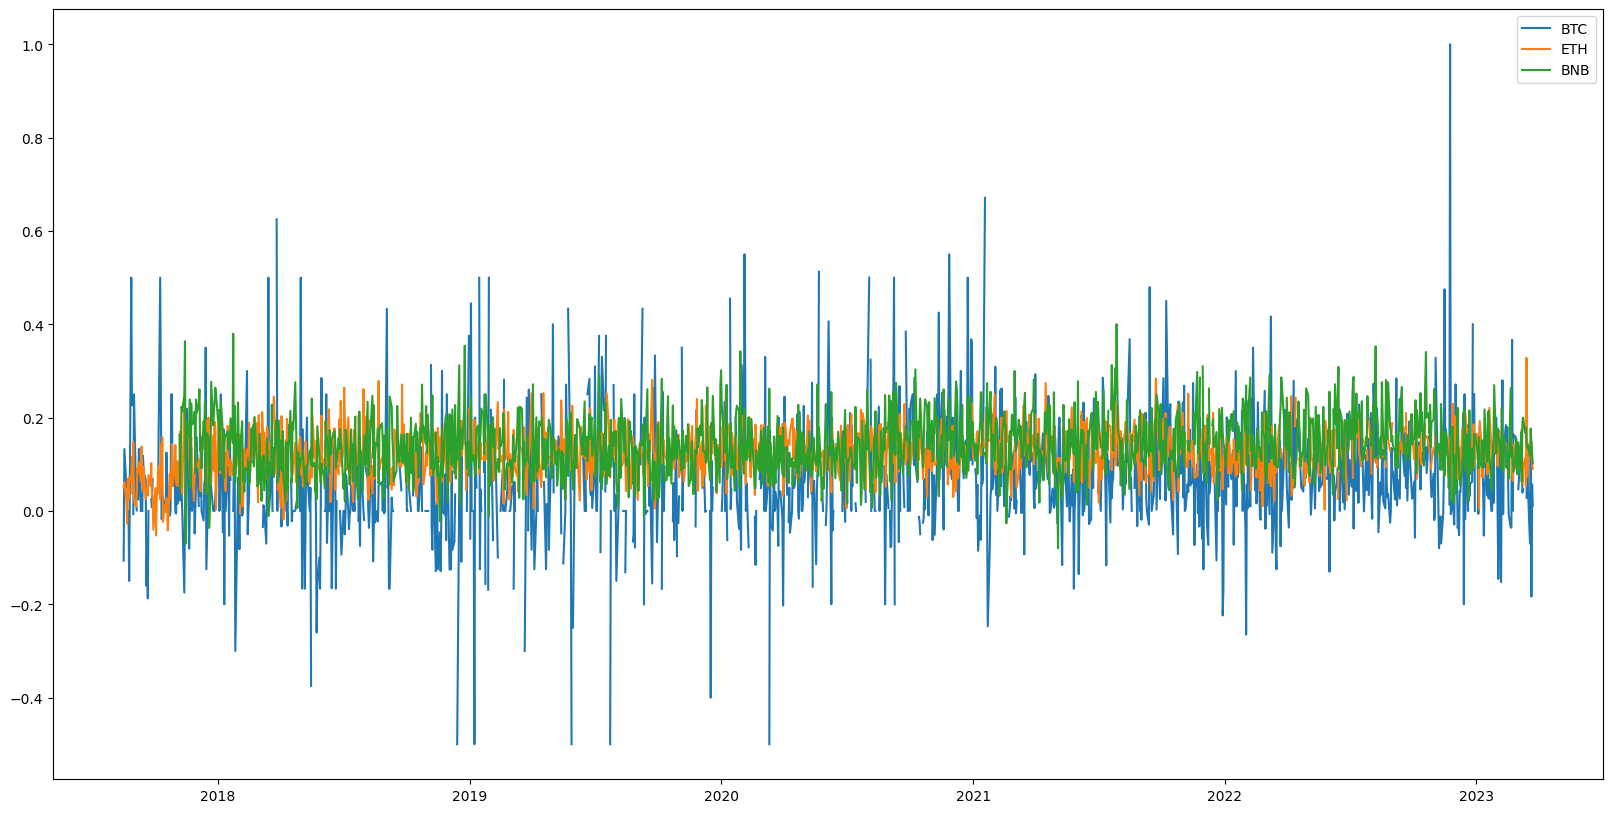

In [63]:
list_crypto_visu = ["BTC", "ETH", "BNB"]

#dans df, plot toutes les colonne qui finissent par _posts_count
plt.subplots(figsize=(20,10))
for crypto in list_crypto_visu:
    column_name = next(col for col in globals()[crypto].columns if col.endswith('_textblob_polarity_mean'))
    plt.plot(globals()[crypto][column_name], label=crypto)
plt.legend()
plt.show()



In [66]:
df["Close_BTC"].pct_change()

date
2017-08-17         NaN
2017-08-18   -0.041238
2017-08-21   -0.022483
2017-08-22    0.005976
2017-08-23    0.018319
                ...   
2023-03-20    0.011750
2023-03-21    0.014015
2023-03-22   -0.030403
2023-03-23    0.038327
2023-03-24   -0.029720
Name: Close_BTC, Length: 1462, dtype: float64

In [67]:
df["Close_BTC"]

date
2017-08-17     4285.08
2017-08-18     4108.37
2017-08-21     4016.00
2017-08-22     4040.00
2017-08-23     4114.01
                ...   
2023-03-20    27717.01
2023-03-21    28105.47
2023-03-22    27250.97
2023-03-23    28295.41
2023-03-24    27454.47
Name: Close_BTC, Length: 1462, dtype: float64

In [69]:
BTC.describe()

,btc_tweet_count,btc_posts_count,btc_textblob_polarity_min,btc_textblob_polarity_max,btc_textblob_polarity_mean,btc_vader_polarity_compound_min,btc_vader_polarity_compound_max,btc_vader_polarity_compound_mean,Close_BTC,Volume_BTC
count,1462.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1462.000000,1462.000000
mean,599.119699,3.634185,-0.041443,0.202856,0.073757,-0.184212,0.327658,0.069686,19557.335021,85487.224587
std,440.683886,2.872519,0.176066,0.201732,0.131237,0.355531,0.347127,0.253893,16406.665393,96589.151366
min,94.000000,1.000000,-1.000000,-0.500000,-0.500000,-0.949300,-0.796400,-0.796400,3189.020000,500.429975
25%,250.000000,2.000000,-0.125000,0.033333,0.000000,-0.440400,0.000000,-0.058287,7414.002500,35251.568545
50%,515.000000,3.000000,0.000000,0.178680,0.062500,-0.128000,0.361200,0.026183,10936.690000,53110.902810
75%,804.000000,5.000000,0.000000,0.317045,0.134583,0.000000,0.623925,0.217902,29489.535000,86677.203537
max,4248.000000,22.000000,1.000000,1.000000,1.000000,0.937000,0.955400,0.937000,67525.830000,760705.362800


In [70]:
import pandas as pd
import numpy as np

# Exemple de données - à remplacer par vos données réelles
dates = pd.date_range(start='2022-09-01', end='2023-04-30', freq='D')
crypto_forecasts = np.random.randn(len(dates))  # Remplacer par vos prévisions
crypto_real_returns = np.random.randn(len(dates))  # Remplacer par les rendements réels
sigma = np.std(crypto_real_returns)  # Écart-type des rendements sur la période d'apprentissage

# Paramètres initiaux
initial_capital = 10000
portfolio_value = initial_capital

# Historique du portefeuille
portfolio_history = []

for i in range(len(dates)):
    forecast = crypto_forecasts[i]
    real_return = crypto_real_returns[i]

    # Règles d'allocation
    if forecast > 0.5 * sigma:
        allocation = 1.0  # 100% en crypto
    elif forecast < -0.5 * sigma:
        allocation *= 0.5  # Réduire de 50%
    else:
        # Pas de changement en cas de prévision neutre
        pass

    # Mise à jour de la valeur du portefeuille
    portfolio_value *= (1 + allocation * real_return)
    portfolio_history.append(portfolio_value)

# Convertir en DataFrame pour l'analyse
portfolio_df = pd.DataFrame({'Date': dates, 'Portfolio Value': portfolio_history})

# Calcul du Ratio de Sharpe et autres mesures de performance
# ...

# Exportation des résultats
portfolio_df.to_csv('backtest_results.csv')

print("Backtest terminé. Résultats exportés.")


NameError: name 'allocation' is not defined

In [11]:


def calculate_portfolio_performance(full_df, weights_df, balance):
    """
    Calcule la performance d'un portefeuille en utilisant un DataFrame de prix et un DataFrame de poids optimaux.

    Parameters:
    full_df (DataFrame): DataFrame contenant les prix des actifs.
    weights_df (DataFrame): DataFrame contenant les poids optimaux pour chaque actif à différentes dates.
    balance (float): Le solde initial du portefeuille.
    start_date (datetime): Date de début du backtest.
    end_date (datetime): Date de fin du backtest.

    Returns:
    Series: Série représentant la performance cumulée du portefeuille.
    """
    # Trouver la première date où les poids optimaux sont disponibles
    first_valid_date = weights_df.first_valid_index()

    # Initialiser une série pour stocker la valeur du portefeuille
    portfolio_value = pd.Series(index=df.loc[first_valid_date:].index)

    # Variable pour stocker les poids actuels
    current_weights = weights_df.loc[first_valid_date]

    df = df.pct_change().dropna(axis=0)

    # Initialiser la valeur précédente des poids à zéro
    previous_weights = pd.Series([0]*len(current_weights), index=current_weights.index)

    for date in df.loc[first_valid_date:].index:
        port_value = 0

        # Mettre à jour les poids si une nouvelle valeur est disponible
        if date in weights_df.index:
            new_weights = weights_df.loc[date]
            current_weights = new_weights
            previous_weights = new_weights.copy()

        for i in range(len(current_weights)):
            port_value += current_weights[i] * (1 + df.loc[date][i]) * balance

        port_value += (1 - current_weights.sum()) * balance

        portfolio_value[date] = port_value
        balance = port_value

    return portfolio_value

df_close


,BTC,ETH,BNB,LTC,DOGE,BCH,XRP,MATIC,ADA,DOT,SOL
date,,,,,,,,,,,
2022-08-30,19811.66,1524.59,281.6,53.01,0.06154,114.6,0.3267,0.8153,0.4531,7.000,31.47
2022-08-31,20050.02,1554.10,279.2,53.84,0.06135,115.2,0.3277,0.8323,0.4462,7.030,31.50
2022-09-01,20131.46,1586.16,278.3,57.58,0.06239,116.7,0.3331,0.8844,0.4575,7.180,31.61
2022-09-02,19951.86,1575.35,277.5,60.99,0.06165,116.3,0.3314,0.8719,0.4543,7.300,31.23
2022-09-05,19796.84,1617.80,276.9,60.39,0.06275,125.7,0.3329,0.8819,0.4984,7.360,32.18
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,27717.01,1732.78,332.5,78.05,0.07137,130.3,0.3734,1.1027,0.3321,6.092,22.13
2023-03-21,28105.47,1801.23,334.4,82.48,0.07660,134.0,0.4696,1.1526,0.3696,6.363,22.53
2023-03-22,27250.97,1734.33,321.1,87.27,0.07385,125.9,0.4213,1.1077,0.3596,6.053,21.42


/var/folders/vk/z0p4r5z97d99dp7mpbt9yd1w0000gn/T/ipykernel_33921/3171290920.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  port_value += current_weights[i] * (1 + df.loc[date][i]) * balance
/var/folders/vk/z0p4r5z97d99dp7mpbt9yd1w0000gn/T/ipykernel_33921/3171290920.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  port_value += current_weights[i] * (1 + df.loc[date][i]) * balance


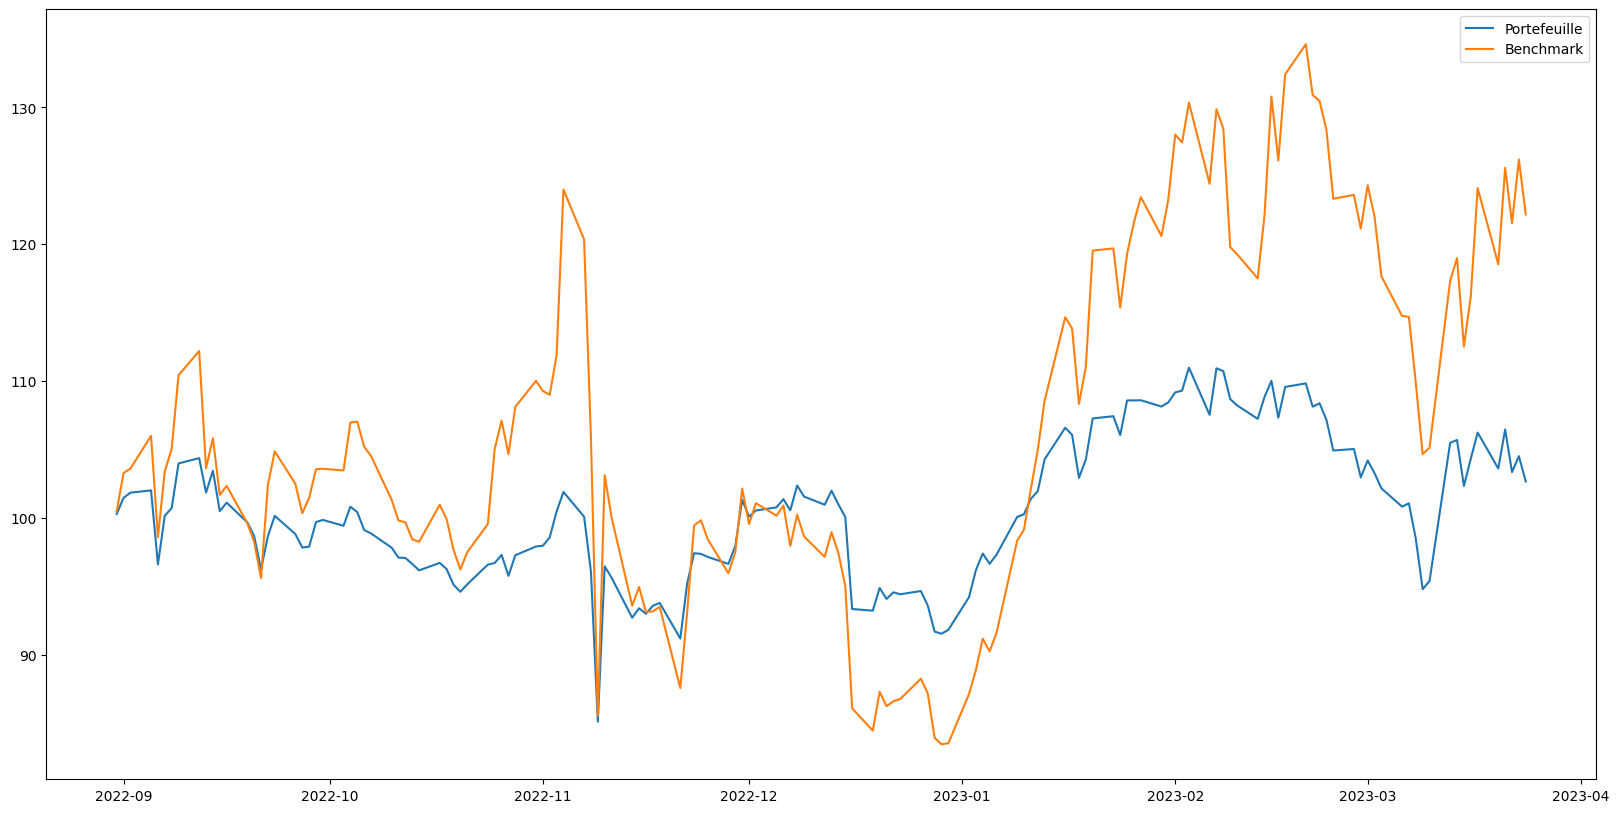

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_portfolio_performance(df, weights_df, balance):
    """
    Calcule la performance d'un portefeuille en utilisant un DataFrame de prix et un DataFrame de poids optimaux.

    Parameters:
    full_df (DataFrame): DataFrame contenant les prix des actifs.
    weights_df (DataFrame): DataFrame contenant les poids optimaux pour chaque actif à différentes dates.
    balance (float): Le solde initial du portefeuille.
    start_date (datetime): Date de début du backtest.
    end_date (datetime): Date de fin du backtest.

    Returns:
    Series: Série représentant la performance cumulée du portefeuille.
    """
    # Prendre la date de la première ligne de weights_df
    first_valid_date = weights_df.first_valid_index()


    # Initialiser une série pour stocker la valeur du portefeuille
    portfolio_value = pd.Series(index=df.loc[first_valid_date:].index)

    # Variable pour stocker les poids actuels
    current_weights = weights_df.loc[first_valid_date]

    for date in df.loc[first_valid_date:].index:
        port_value = 0

        # Mettre à jour les poids si une nouvelle valeur est disponible
        if date in weights_df.index:
            new_weights = weights_df.loc[date]
            current_weights = new_weights
            

        for i in range(len(current_weights)):
            port_value += current_weights[i] * (1 + df.loc[date][i]) * balance

        port_value += (1 - current_weights.sum()) * balance

        portfolio_value[date] = port_value
        balance = port_value

    return portfolio_value

path = "/Users/julesmourgues/Documents/Data Challenge/"

# Importer les données Rennes_DataChallenge2024_Cryptomarkets_dataset.xlsx
df = pd.read_excel(path + "Rennes_DataChallenge2024_Cryptomarkets_dataset.xlsx", sheet_name="data")

list_crypto = ["BTC", "ETH", "BNB", "LTC", "DOGE", "BCH", "XRP", "MATIC", "ADA", "DOT", "SOL"]



#Met en datetime la colonne date
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df = df.drop(columns=["Unnamed: 0"])

#Pour chaque nom dans la liste des cryptos, on crée un dataframe avec les colonnes qui commence par le nom de la crypto en minuscle, et les colonnes qui finisse par le nom de la crypto en majuscule
for crypto in list_crypto:
    globals()[crypto] = df[[col for col in df.columns if col.startswith(crypto.lower()) or col.endswith(crypto.upper())]]
    #Supprimer les lignes jusqu'à la première date où le prix de cloture est disponible
    globals()[crypto] = globals()[crypto].dropna(axis=0, subset=["Close_" + crypto.upper()])


#Récupère dans un df Close pour chaque crypto
df_close = pd.DataFrame()
for crypto in list_crypto:
    df_close[crypto] = globals()[crypto]["Close_" + crypto.upper()]

#laisse uniquement les donnée à partir du 31/08/2022
df_close = df_close.loc["2022-08-30":]

returns = df_close.pct_change().dropna(axis=0)

#Récupération des prédictions
y_pred_models = {}

for crypto in list_crypto:
    y_pred_model = np.random.randint(2, size=len(returns))
    globals()["y_pred_model_" + crypto] = y_pred_model
    y_pred_models[crypto] = y_pred_model

y_pred_models

#Création de poids aléatoire
weights = np.random.random(len(list_crypto))
weights /= weights.sum()
weight_portefeuille = pd.DataFrame([weights], columns=list_crypto, index=pd.to_datetime(['2022-08-31']))
weight_portefeuille

returns_portfolio = pd.DataFrame()

for crypto, y_pred_model in y_pred_models.items():
    returns_portfolio[crypto] = returns[crypto] * y_pred_model

balance = 100

perf_port = calculate_portfolio_performance(returns_portfolio, weight_portefeuille, balance)
perf_bench = calculate_portfolio_performance(returns, weight_portefeuille, balance)

#Plot la performance du portefeuille et du benchmark
plt.subplots(figsize=(20,10))
plt.plot(perf_port, label="Portefeuille")
plt.plot(perf_bench, label="Benchmark")
plt.legend()
plt.show()

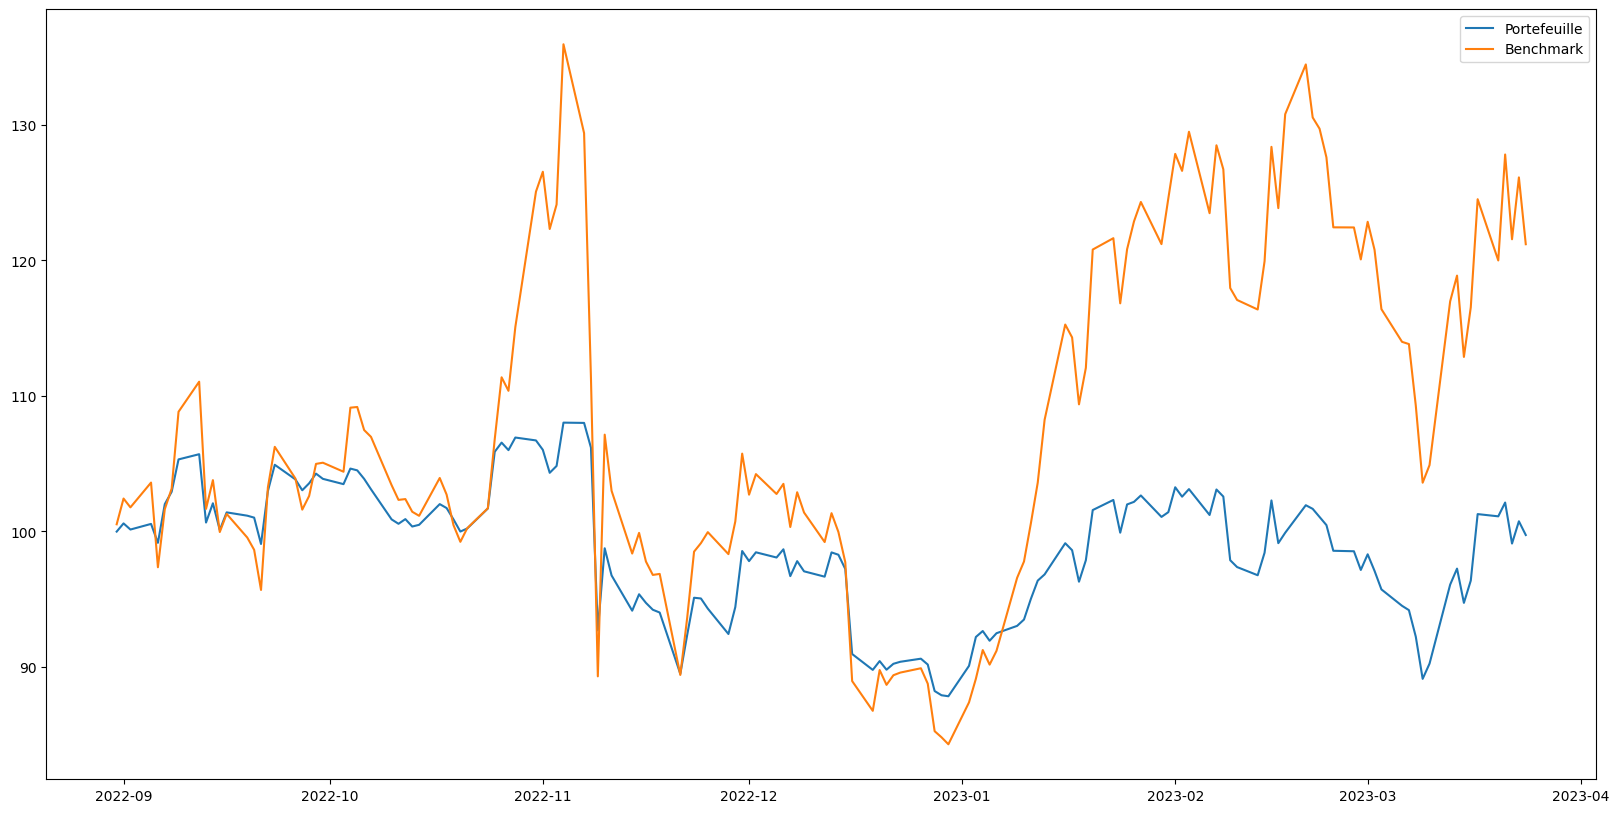